In [ ]:
#Homework 3 Task 3


In [66]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import cv2
import scipy.cluster as cluster
from sklearn.cluster import KMeans
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)


Populating the interactive namespace from numpy and matplotlib


TASK 3.1 -- LOAD IMAGES AND SHOW THEM.

In [67]:
# LOAD
images =[]
images.append(mpimg.imread('HW3/Images/Q3/15.bmp'))
images.append(mpimg.imread('HW3/Images/Q3/171.bmp'))
images.append(mpimg.imread('HW3/Images/Q3/45.bmp'))
images.append(mpimg.imread('HW3/Images/Q3/81.bmp'))

# SHOW
f,ax = plt.subplots(2,2)
ax[0][0].imshow(images[0],cmap="gray")
ax[0][0].set_title('Image 1 - Many Trees')
ax[0][1].imshow(images[1],cmap="gray")
ax[0][1].set_title('Image 2 - Many Patterns')
ax[1][0].imshow(images[2],cmap="gray")
ax[1][0].set_title('Image 3 - Two Trees and a boat')
ax[1][1].imshow(images[3],cmap="gray")
ax[1][1].set_title('Image 4 - A large boat')

plt.show()
#for i in range(4):
#    ax[i].imshow(images[i],cmap="gray")
#plt.show()

Image 1 includes many similarly looking trees at the bottom of the image and many similar looking trees at the top of the image. The trees seem to have a similar pattern and texture. The water in between the trees also seems to have the texture. There seems to be a white "coastline" that can be identified as "edges" between the water and the top trees.

Image 2: This image seems to be a concatenation of many different rectangles and square patterns. The texture changes repeatedly across the image in both the horizontal and vertical directions in distinct areas as if several square patches with perfectly concatenated. there seem to be clear horizontal and vertical lines separating the groups, but it is not easy to detect individual edges by pixel colors. The eye identifies the area.

Image 3: There are two similar looking trees on the left and right side of the image. Their texture is the similar. There are clouds with similar texture. A beach in the distance with similar texture. And, a boat with a distinct white sail. The water, is identifiable, because of the presence of the boat, however, the reflections of the clouds make it quite difficult to distinguish.

The trees in the background of the picture are similar looking. Without seeing the close trees or the boat they are 
not easily identifiable. There may even be several people on the beach as there are small dark areas. These areas could also be shadows of trees.

Image 4: there is a boat in the middle of the water. The texture of the water is "wavy", The pixel colors change in a similar pattern across the ocean. There boat has a clear black edge distinguishing the start of the boat and end of the water.

In [68]:
#Task 3.2

In [69]:
img = images[2]

(<matplotlib.text.Text at 0x10bad4c50>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

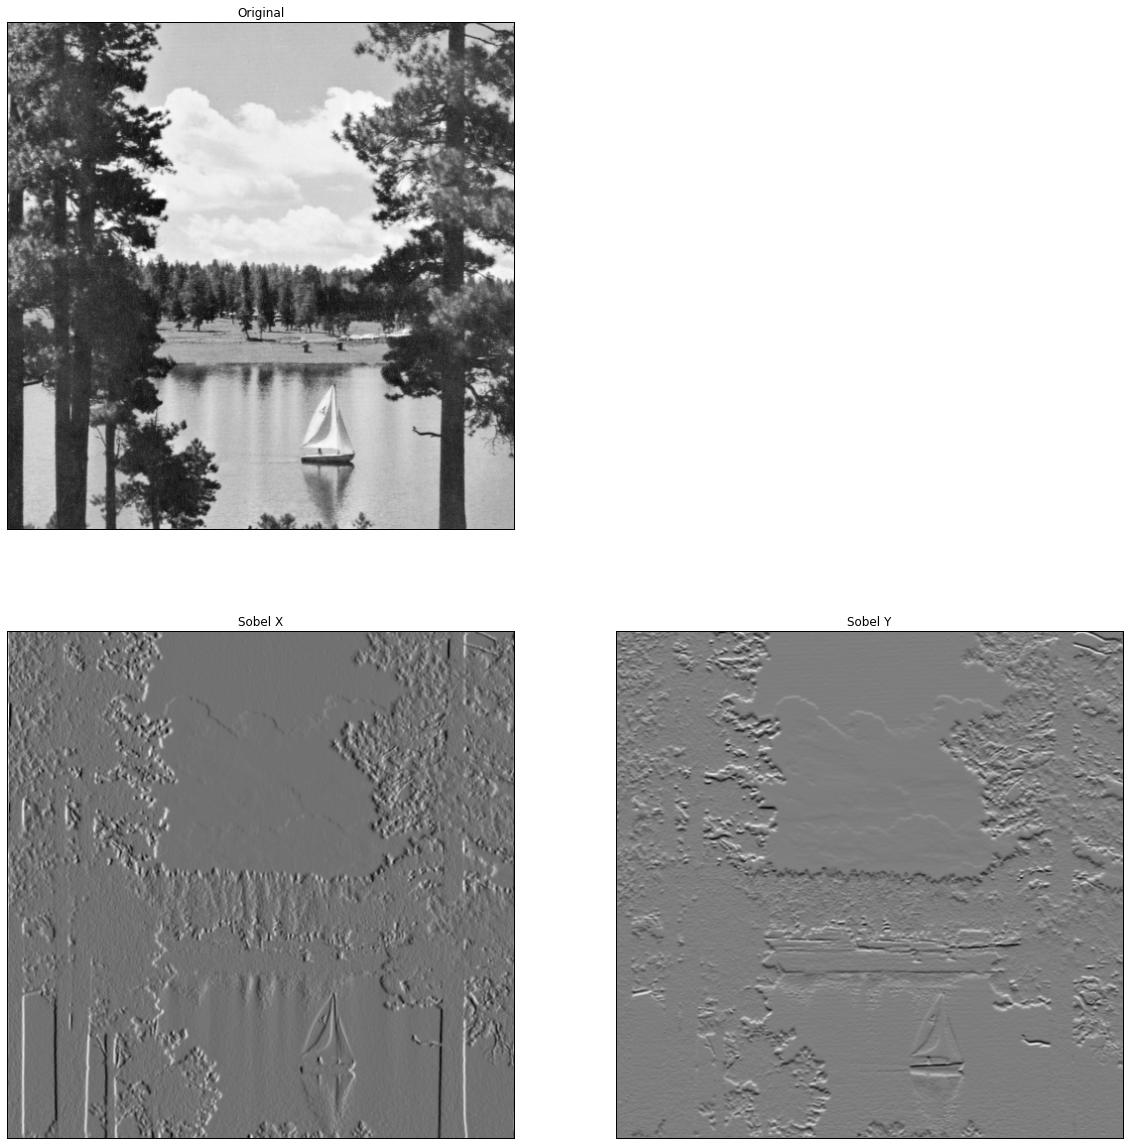

In [70]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])


In [71]:
def compute_orientation(sobelx,sobely):
    dim = sobelx.shape
    sobel_orientation = np.zeros(dim)

    for i in range(sobelx.shape[0]):
        for j in range(sobelx.shape[1]):
            m_y = sobely[i][j]
            m_x = sobelx[i][j]
            theta = math.atan2(m_y,m_x)
            sobel_orientation[i][j]=theta
    return sobel_orientation


In [72]:
def compute_magnitude(sobelx,sobely):
    dim = sobelx.shape
    sobel_magnitude = np.zeros(dim)

    for i in range(sobelx.shape[0]):
        for j in range(sobelx.shape[1]):
            m_y = sobely[i][j]
            m_x = sobelx[i][j]
            magnitude = math.sqrt(m_y*m_y + m_x*m_x)
            
            sobel_magnitude[i][j]=magnitude
    return sobel_magnitude


In [73]:
def show_orientation_magnitude(sobelx,sobely):
    sobel_orientation = compute_orientation(sobelx,sobely)
    sobel_magnitude = compute_magnitude(sobelx,sobely)
    
    plt.subplot(3,2,1),plt.imshow(img,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(3,2,3),plt.imshow(sobelx,cmap = 'gray')
    plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
    plt.subplot(3,2,4),plt.imshow(sobely,cmap = 'gray')
    plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
    plt.subplot(3,2,5),plt.imshow(sobel_orientation,cmap = 'gray')
    plt.title('Orientation'), plt.xticks([]), plt.yticks([])
    plt.subplot(3,2,6),plt.imshow(sobel_magnitude,cmap = 'gray')
    plt.title('Magnitude'), plt.xticks([]), plt.yticks([])
    
    
    return sobel_orientation, sobel_magnitude

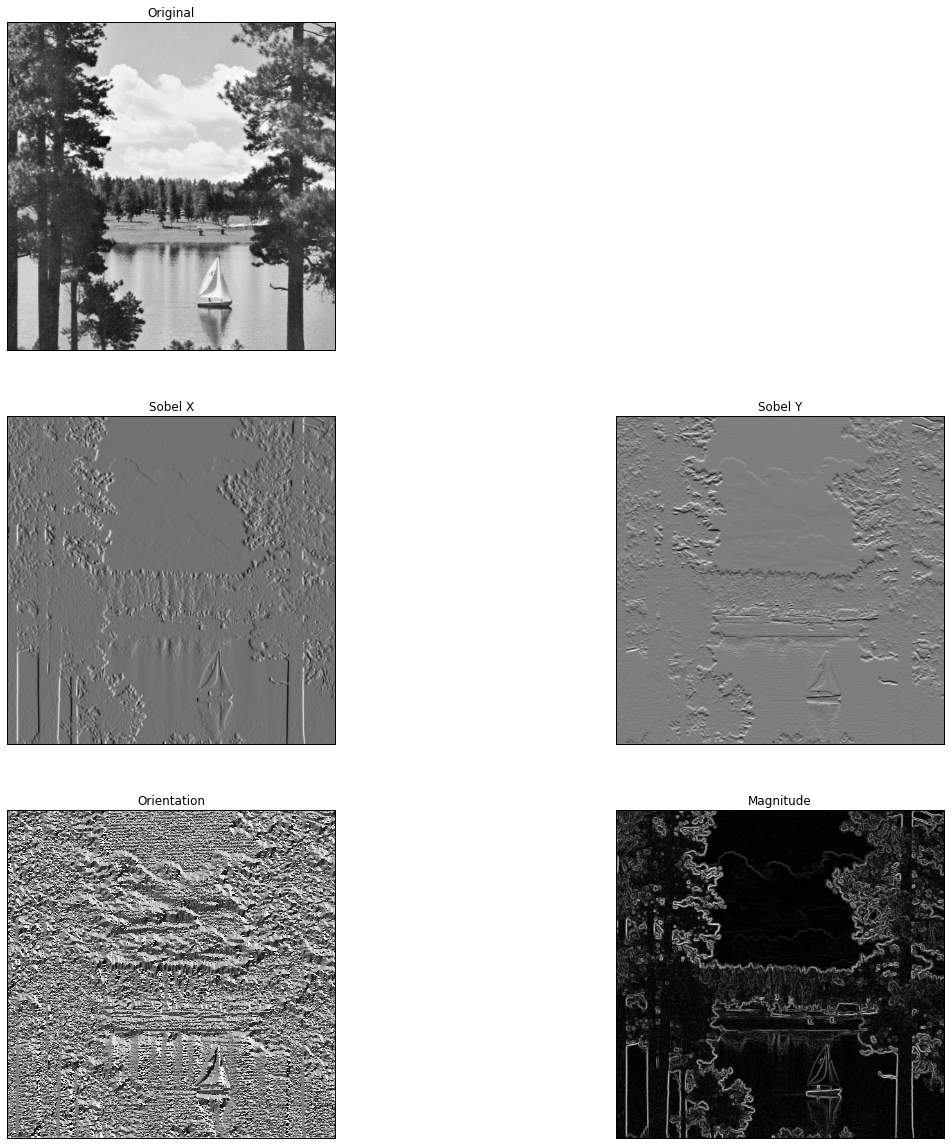

In [74]:
sobel_orientation, sobel_magnitude = show_orientation_magnitude(sobelx,sobely)

In [75]:
def quantize_orientation_angle(angle,cutoff,val):
    k = True
    i = 0
    while ( k == True and i < len(cutoff) ):
        
        if (angle <= cutoff[i]):
            k = False
            return val[i]
        i = i+1 
    return val[i]
       


In [76]:
def quantize_orientation(sobel_orientation,bins):
    #Create the cutoffs, and rounding values.  
    cutoff = []
    val = []
    dim = sobel_orientation.shape
    sobel_orientation_quantized = np.zeros(dim)

    for i in range(1,bins*2):
        if (i%2 == 0):
            cutoff.append(np.percentile(sobel_orientation,6.125*i))
        else:
            val.append(np.percentile(sobel_orientation,6.125*i))
    
    for i in range(sobel_orientation.shape[0]):
        for j in range(sobel_orientation.shape[1]):
            sobel_orientation_quantized[i][j] = quantize_orientation_angle(sobel_orientation[i][j],cutoff,val)
            
        
    return sobel_orientation_quantized

In [77]:
sobel_orientation_quantized = quantize_orientation(sobel_orientation,8)

In [78]:
def show_sobel_quantized(img):
    sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
    sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
    sobel_orientation = compute_orientation(sobelx,sobely)
    sobel_orientation_quantized = quantize_orientation(sobel_orientation,8)
    plt.subplot(1,2,1),plt.imshow(sobel_orientation,cmap = 'gray')
    plt.title('Sobel-Orientation'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(sobel_orientation_quantized,cmap = 'gray')
    plt.title('Sobel-Orientation-Quantized'), plt.xticks([]), plt.yticks([])


# Show Discretized images. Replace n = 0,1,2,3

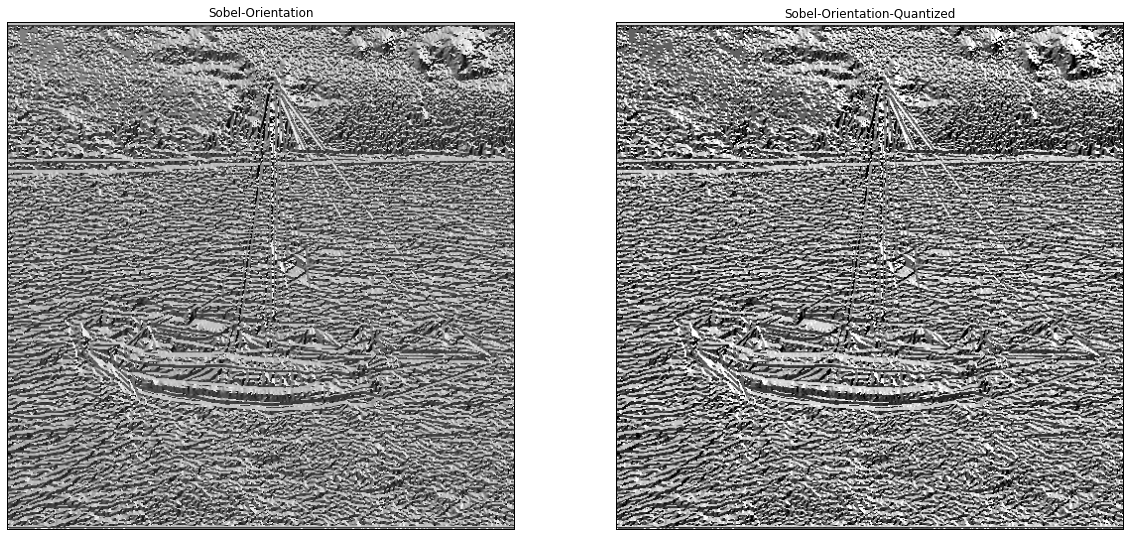

In [82]:
n=3
show_sobel_quantized(images[n])

In [83]:
#Descriptor
#- Create a feature vector for every pixel, looking at it's 11x11 neighborhood
#- For each feature vector, there are 8 dimensions, where each dimension has a weight corresponding to the count of orientations with a magnitude above threshold, T
#- Boundaries are handled because "outside" pixels have a threshold below T (assuming zero padding)

#Padding.

#sobel_magnitude
#sobel_orientation_quantized


def compute_descriptor(sobel_magnitude,sobel_orientation_quantized,threshold):
    dim = sobel_orientation_quantized.shape
    #descriptor = np.zeros(dim) --- NP.array only accepts values.
    descriptor = [[0 for x in range(dim[0])] for x in range(dim[1])] ### lists accept tuple values.
    
    for i in range(len(descriptor)):
        for j in range(len(descriptor[0])):
            descriptor[i][j] = compute_descriptor_for_pixel(sobel_orientation_quantized,i,j,threshold,sobel_magnitude)
            #if sobel_magnitude[i][j]>threshold:
             #   #Create a feature vector for every pixel, looking at its 11x11 neighborhood.
            #    descriptor[i][j] = compute_descriptor_for_pixel(sobel_orientation_quantized,i,j)
            #else:
            #    descriptor[i][j] = np.zeros(8) 
    
    descriptor_array = np.array(descriptor)
    return descriptor_array.reshape(descriptor_array.shape[0]*descriptor_array.shape[1],descriptor_array.shape[2]),[descriptor_array.shape[0],
                                                                                                                    descriptor_array.shape[1]]

def compute_descriptor_for_pixel(sobel_orientation_quantized,i,j,threshold,sobel_magnitude):
    #get submatrix.
    #border bases. 
    x_low = i-5
    y_low = j-5
    x_high = i+6
    y_high = j+6
    
    if i < 5:
        x_low = 0
        x_high = i+6

    if j < 5:
        y_low = 0
        y_high = j+6
       
    if i>sobel_orientation_quantized.shape[0]-6:
        x_low = i-6
        x_high = sobel_orientation_quantized.shape[0]
    if j>sobel_orientation_quantized.shape[1]-6:
        y_low = j-6
        y_high = sobel_orientation_quantized.shape[1]
    submatrix = sobel_orientation_quantized[x_low:x_high,y_low:y_high]
    subsobel = sobel_magnitude[x_low:x_high,y_low:y_high]
    for i in range(subsobel.shape[0]):
        for j in range(subsobel.shape[1]):
            if (subsobel[i][j] < threshold):
                submatrix[i][j] = 0 
               
    return np.histogram(np.reshape(submatrix,-1),8)[0]

In [84]:
descriptor, descriptor_dimensioms = compute_descriptor(sobel_magnitude,sobel_orientation_quantized,10)

In [130]:
#Compute Centroids for 5, 10, 50 clusters. 

def compute_centroids_labels(descriptor,numb_clusters,descriptor_dimensioms): 
    # http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    # centroids,labels =  cluster.vq.kmeans2(descriptor,numb_clusters)
    est = KMeans(n_clusters=numb_clusters)
    est.fit(descriptor)
    labels = est.labels_

    # Reshape the labels 
    
    return labels.reshape(descriptor_dimensioms[1],descriptor_dimensioms[0])

def show_centroids_colormap(image,numb_clusters,threshold,discrete_bins=8,colorlist=['white','yellow','green','blue','black','red']):
   
    sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
    sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)
    
    sobel_orientation = compute_orientation(sobelx,sobely)
    sobel_magnitude = compute_magnitude(sobelx,sobely)
    
    sobel_orientation_quantized = quantize_orientation(sobel_orientation,discrete_bins)
    
    descriptor,descriptor_dimensioms = compute_descriptor(sobel_magnitude,sobel_orientation_quantized,threshold)
    
    labels_square = compute_centroids_labels(descriptor,numb_clusters,descriptor_dimensioms)
    # If label = number then different color.... 
    fig = pyplot.figure()
    cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',colorlist,numb_clusters)
    img2 = pyplot.imshow(labels_square,interpolation='nearest',cmap = cmap2,origin='upper')
    pyplot.colorbar(img2,cmap=cmap2)
    fig.savefig("image2.png")
    
    


# Plot the results and discuss them. What do you see? Does it make sense? Explain.

In [ ]:
img_numb = 3
img = images[img_numb]
numb_clusters = 5 #or 10,50
threshold = 25

#plt.imshow(img,cmap = 'gray')
#plt.title('Image'), plt.xticks([]), plt.yticks([])
    
show_centroids_colormap(img_gray,numb_clusters,threshold)


# Try a few extra images. 
1. rubix cube
2. bridge 

In [145]:
#img = mpimg.imread('HW3/ExtraImages/bridge.jpg')
#numb_clusters = 5 #or 10,50
#threshold = 20


#Convert to grayscale by using average of RGB
def average(pixel):
    return (int(pixel[0])+int(pixel[1])+int(pixel[2]))/3

def rgb2gray(image):
    gray = np.zeros((image.shape[0], image.shape[1])) # init 2D numpy array
    for rownum in range(len(image)):
        for colnum in range(len(image[rownum])):
            gray[rownum][colnum] = average(image[rownum][colnum])

    return gray

#img_gray = rgb2gray(img)


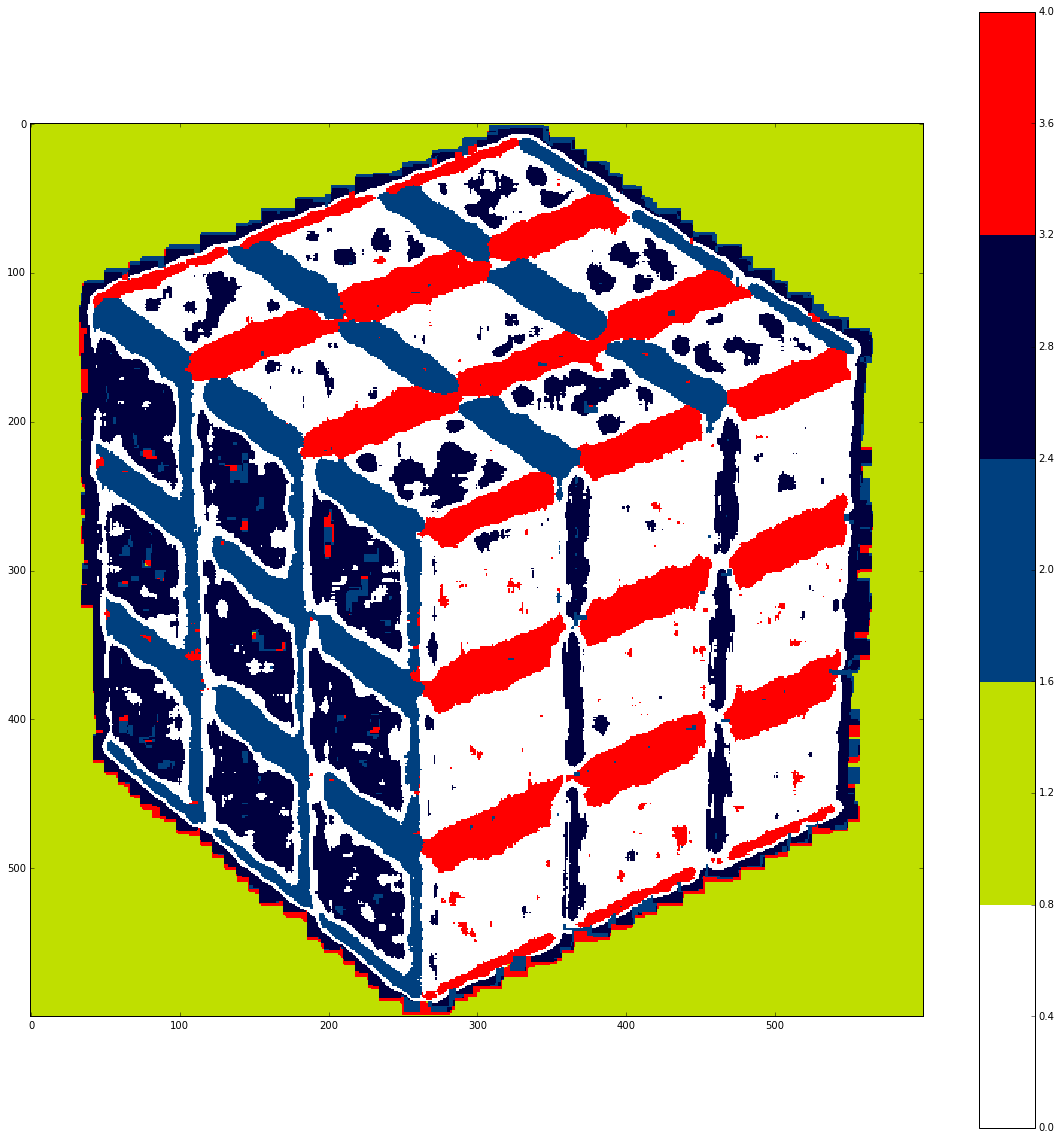

In [168]:
img = mpimg.imread('HW3/ExtraImages/grayscale_rubik_s_cube.jpg')
numb_clusters = 5 #or 10,50
threshold = 5

img_gray = rgb2gray(img)

show_centroids_colormap(img_gray,numb_clusters,threshold)


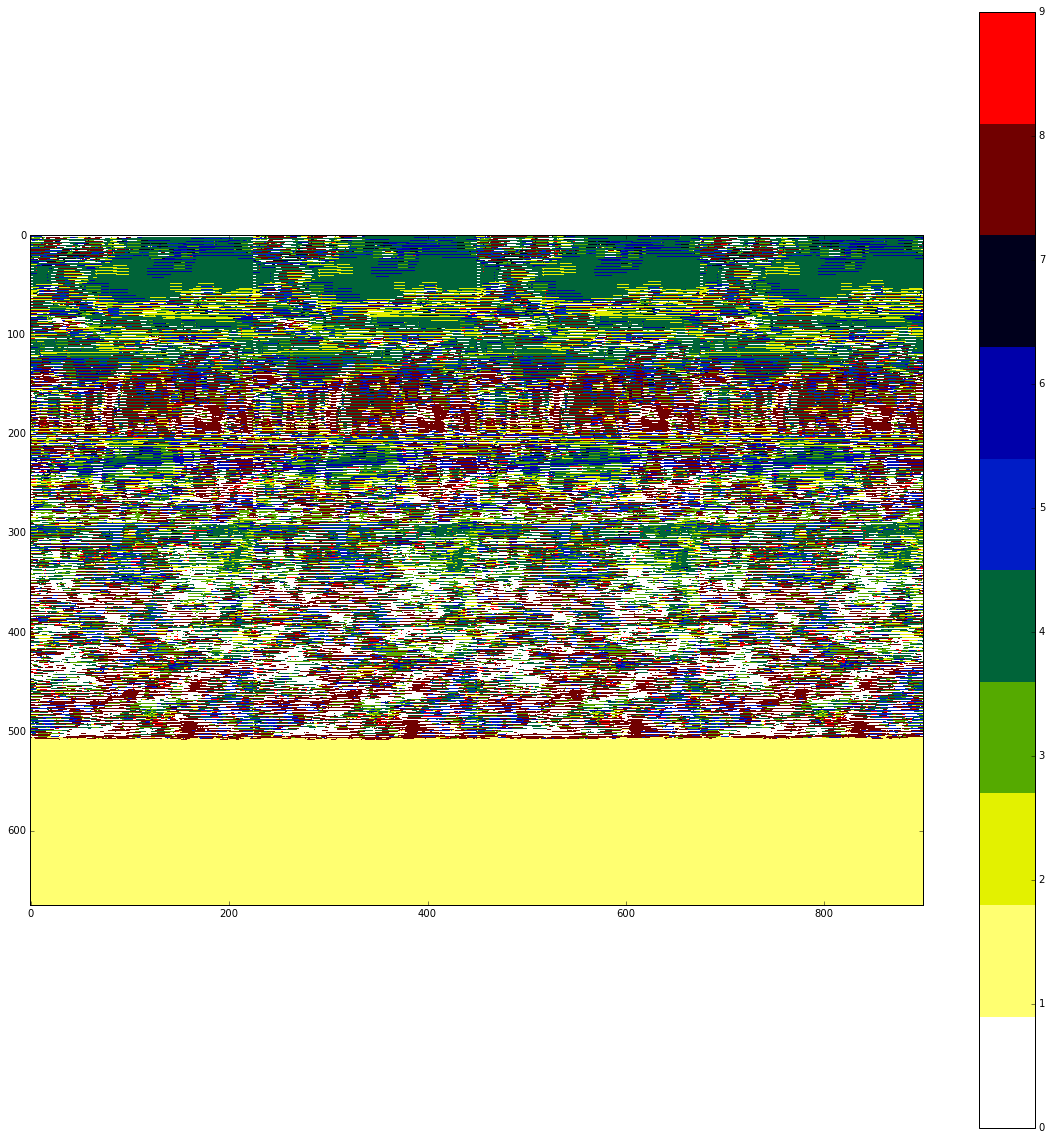

In [ ]:
img = mpimg.imread('HW3/ExtraImages/harbour_bridge_in_grayscale_by_brichards85-d3a9yoh.jpg')
numb_clusters = 10 #or 10,50
threshold = 50

img_gray = rgb2gray(img)

show_centroids_colormap(img_gray,numb_clusters,threshold)


In [ ]:
img = mpimg.imread('HW3/ExtraImages/bridge.jpg')
numb_clusters = 10 #or 10,50
threshold = 20

img_gray = rgb2gray(img)

show_centroids_colormap(img_gray,numb_clusters,threshold)